## 1) Libraries Installation
##### The cell below is to help you keep track the libraries used and install them quickly.
##### Ensure the correct library names are used, and follow the syntax: **%pip install PACKAGE_NAME**.

In [280]:
%pip install pandas
%pip install matplotlib
# add commented pip installation lines for packages used as shown above for ease of testing
# the line should follow the format %pip install PACKAGE_NAME

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


## 2) Main Section for Code
### **ALL code for machine learning and dataset analysis** should be entered below.
##### Ensure that your code is clear and readable.
##### Remember to include comments and markdown notes as necessary to explain and highlight important segments of your code.

In [281]:
###...code...###
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt





In [282]:
# # Plot the First 10 Columns Against `sasdate`
# plt.figure(figsize=(15, 10))  # Set the figure size

# # Loop through the first 10 columns and plot each against `sasdate`
# for i in range(1, 11):
#     plt.plot(df['sasdate'], df.iloc[:, i], label=df.columns[i])

# plt.xlabel('sasdate')  # Set the x-axis label
# plt.ylabel('Values')  # Set the y-axis label
# plt.title('First 10 Columns vs sasdate')  # Set the plot title
# plt.legend()  # Add a legend
# plt.show()  # Display the plot

# Quarterly Data

In [283]:
# Load the new DataFrame
df_quarterly = pd.read_csv(r"./Quarterly Data.csv")
# Delete the first two rows (row 0 and row 1) from df_quarterly
df_quarterly = df_quarterly.drop([0, 1]).reset_index(drop=True)

# Display the first few rows to verify the deletion
df_quarterly.head()
# Display the first few rows of the new DataFrame
df_quarterly.head()

,sasdate,GDPC1,PCECC96,PCDGx,PCESVx,PCNDx,GPDIC1,FPIx,Y033RC1Q027SBEAx,PNFIx,...,TNWMVBSNNCBBDIx,TLBSNNBx,TLBSNNBBDIx,TABSNNBx,TNWBSNNBx,TNWBSNNBBDIx,CNCFx,S&P 500,S&P div yield,S&P PE ratio
0,3/1/1959,3352.129,2039.017,68.6651,1374.1739,689.1172,354.894,357.0174,47.8021,171.0783,...,1341.67,333245.24,266668.11,2426352.41,2092.54,1674.48,124.9663,55.5167,3.1765,18.6211
1,6/1/1959,3427.667,2070.508,71.2495,1394.7096,694.8197,382.500,368.0640,49.2332,176.0004,...,1294.15,345845.01,273329.36,2434975.21,2088.55,1650.63,126.5305,57.5067,3.1012,19.2899
2,9/1/1959,3430.057,2092.138,72.6270,1413.6627,697.4699,357.798,371.9585,50.8372,180.7406,...,1320.72,354808.05,275139.48,2434604.03,2079.21,1612.34,128.9557,58.7300,3.0720,18.9544
3,12/1/1959,3439.832,2094.495,69.1573,1430.8157,701.7617,369.442,367.6452,50.7342,180.2333,...,1165.65,349400.81,254967.79,2429055.21,2079.05,1517.14,137.0372,57.7633,3.1572,17.8221
4,3/1/1960,3517.181,2114.532,71.3815,1443.7405,703.5338,406.581,379.9162,52.4985,186.4967,...,1327.63,362821.95,278692.55,2451394.44,2087.97,1603.82,130.1872,56.2767,3.3850,16.8284


## Map names to variable description

In [284]:
df_var_descr= pd.read_csv(r"./Variable Description.csv", encoding='latin1')


In [285]:
new_col=df_var_descr[['FRED MNEMONIC', 'DESCRIPTION']].set_index('FRED MNEMONIC').to_dict()['DESCRIPTION']

In [286]:
df_quarterly= df_quarterly.rename(columns=new_col)


## Adding percentage change columns, converting to datetime

In [287]:
# Create percentage change columns for every column in df_quarterly
for column in df_quarterly.columns:
    if column != 'sasdate' :  # Skip the 'sasdate' column
        df_quarterly["Percentage Change of "+ column] = df_quarterly[column].pct_change()*100

#convert to datetime
df_quarterly['sasdate'] = pd.to_datetime(df_quarterly['sasdate'])


C:\Users\tanke\AppData\Local\Temp\ipykernel_34164\2994941314.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_quarterly["Percentage Change of "+ column] = df_quarterly[column].pct_change()*100
C:\Users\tanke\AppData\Local\Temp\ipykernel_34164\2994941314.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_quarterly["Percentage Change of "+ column] = df_quarterly[column].pct_change()*100
C:\Users\tanke\AppData\Local\Temp\ipykernel_34164\2994941314.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually 

In [288]:
# Display the first few rows to verify the new columns
df_quarterly.columns.to_list()

['sasdate',
 'Real Gross Domestic Product, 3 Decimal (Billions of Chained 2017 Dollars)',
 'Real Personal Consumption Expenditures (Billions of Chained 2017 Dollars)',
 'Real personal consumption expenditures: Durable goods (Billions of Chained 2017 Dollars), deflated using its own price index',
 'Real Personal Consumption Expenditures: Services (Billions of 2017 Dollars), deflated using its own price index',
 'Real Personal Consumption Expenditures: Nondurable Goods (Billions of 2017 Dollars), deflated using its own price index',
 'Real Gross Private Domestic Investment, 3 decimal (Billions of Chained 2017 Dollars)',
 'Real private fixed investment (Billions of Chained 2017 Dollars), deflated using its own price index',
 'Real Gross Private Domestic Investment: Fixed Investment: Nonresidential: Equipment (Billions of Chained 2017 Dollars), deflated using its own price index',
 'Real private fixed investment: Nonresidential (Billions of Chained 2017 Dollars), deflated using its own pri

## Plotting graph of gdp_pct_change

In [289]:
gdp_pct_change= 'Percentage Change of Real Gross Domestic Product, 3 Decimal (Billions of Chained 2017 Dollars)'

<Axes: xlabel='sasdate', ylabel='Percentage Change of Real Gross Domestic Product, 3 Decimal (Billions of Chained 2017 Dollars)'>

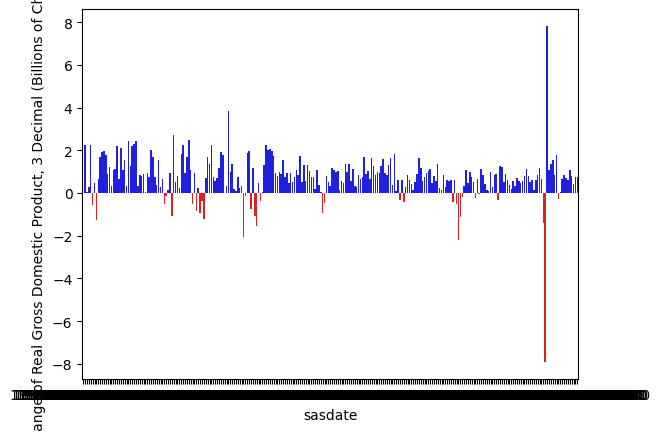

In [290]:
sns.barplot(data=df_quarterly, x='sasdate', y=gdp_pct_change)
# Create a custom color palette

colors = ['red' if val < 0 else 'blue' for val in df_quarterly[gdp_pct_change]]

# Plot the bar plot with custom colors
sns.barplot(data=df_quarterly, x='sasdate', y=gdp_pct_change, palette=colors)

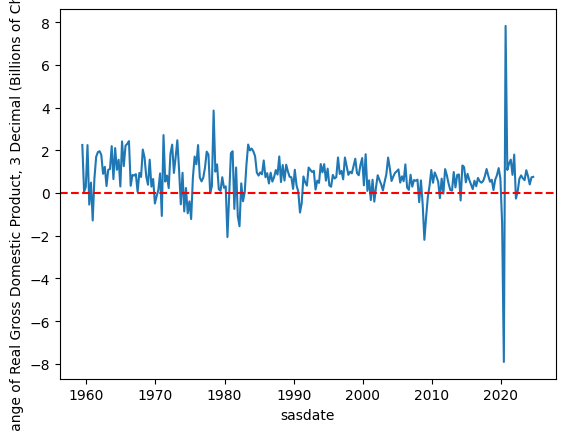

In [291]:
sns.lineplot(data=df_quarterly, x='sasdate', y=gdp_pct_change)
plt.axhline(0, color='red', linestyle='--')
plt.show()

## Displaying GDP growth rate 2008 recession 

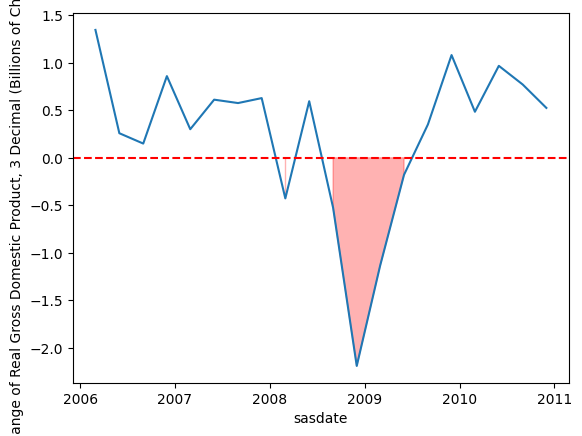

In [292]:
# Convert 'sasdate' to datetime format
df_quarterly['sasdate'] = pd.to_datetime(df_quarterly['sasdate'])

# Filter the DataFrame for the time range from 2006 to 2010
df_quarterly_filtered = df_quarterly[(df_quarterly['sasdate'] >= '2006-01-01') & (df_quarterly['sasdate'] <= '2010-12-31')]

# Plot the filtered data
sns.lineplot(data=df_quarterly_filtered, x='sasdate', y=gdp_pct_change)
plt.axhline(0, color='red', linestyle='--')
plt.fill_between(df_quarterly_filtered['sasdate'], df_quarterly_filtered[gdp_pct_change], where=(df_quarterly_filtered[gdp_pct_change] < 0), color='red', alpha=0.3)
plt.show()

# Monthly Data

In [293]:
df_monthly = pd.read_csv(r"./Monthly Data.csv")
# Delete the first two rows (row 0 and row 1) from df_monthly
df_monthly = df_monthly.drop([0, 1]).reset_index(drop=True)



## Map variable descriptions to column names

In [294]:
df_monthly= df_monthly.rename(columns=new_col) #new_col from above code


## Adding percentage change columns, converting to datetime

In [295]:
# Create percentage change columns for every column in df_quarterly
for column in df_monthly.columns:
    if column != 'sasdate' :  # Skip the 'sasdate' column
        df_monthly["Percentage Change of "+ column] = df_monthly[column].pct_change()*100

#convert to datetime
df_monthly['sasdate'] = pd.to_datetime(df_monthly['sasdate'])

C:\Users\tanke\AppData\Local\Temp\ipykernel_34164\1281385427.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly["Percentage Change of "+ column] = df_monthly[column].pct_change()*100
C:\Users\tanke\AppData\Local\Temp\ipykernel_34164\1281385427.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthly["Percentage Change of "+ column] = df_monthly[column].pct_change()*100
C:\Users\tanke\AppData\Local\Temp\ipykernel_34164\1281385427.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the resu

In [296]:
df_monthly.columns.to_list()

['sasdate',
 'RPI',
 'W875RX1',
 'DPCERA3M086SBEA',
 'Real Manufacturing and Trade Industries Sales (Millions of Chained 2017 Dollars)',
 'RETAILx',
 'Industrial Production Index (Index 2017=100)',
 'IPFPNSS',
 'Industrial Production: Final Products (Market Group) (Index 2017=100)',
 'Industrial Production: Consumer Goods (Index 2017=100)',
 'Industrial Production: Durable Consumer Goods (Index 2017=100)',
 'Industrial Production: Nondurable Consumer Goods (Index 2017=100)',
 'Industrial Production: Business Equipment (Index 2017=100)',
 'Industrial Production: Materials (Index 2017=100)',
 'Industrial Production: Durable Materials (Index 2017=100)',
 'Industrial Production: Nondurable Materials (Index 2017=100)',
 'Industrial Production: Manufacturing (SIC) (Index 2017=100)',
 'Industrial Production: Residential Utilities (Index 2017=100)',
 'Industrial Production: Fuels (Index 2017=100)',
 'Capacity Utilization: Manufacturing (SIC) (Percent of Capacity)',
 'HWI',
 'HWIURATIO',
 'CLF1